##<b> Project Name </b>

## Project Type - EDA
## Contribution - Individual
## Member- Kritika Sharma

##<b>Airbnb is an American San Francisco-based company operating an online marketplace for short-term homestays and experiences.The company acts as a broker and charges a commission from each booking. The company was founded in 2008.</b>

##<b>Explore and analyze the data to discover results and statistics for different room types, locations and other deatils needed for booking.</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/Capstone Project/' 
df_Air=pd.read_csv(file_path + 'Airbnb NYC 2019.csv')
df_host=pd.read_csv(file_path + 'host_id.csv')
df_year=pd.read_csv(file_path + 'review_year.csv')
df_neighbour=pd.read_csv(file_path + 'neighbourhood.csv') 
df_perform=pd.read_csv(file_path + 'Performance.csv')

Mounted at /content/drive


In [3]:
df_Air.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
df_Air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df_host

,host_id,host_name
0,2787,John
1,2845,Jennifer
2,4632,Elisabeth
3,4869,LisaRoxanne
4,7192,Laura
...,...,...
37452,274307600,Jonathan
37453,274311461,Scott
37454,274321313,Kat
37455,23492952,Ilgar & Aysel


**Number of times Person becoming host**

In [6]:
df_host.host_name.value_counts()

Michael           335
David             318
Alex              226
Daniel            208
Sarah             199
                 ... 
Amine               1
Sierra64            1
Utku                1
Greg & Adriane      1
Ilgar & Aysel       1
Name: host_name, Length: 11452, dtype: int64

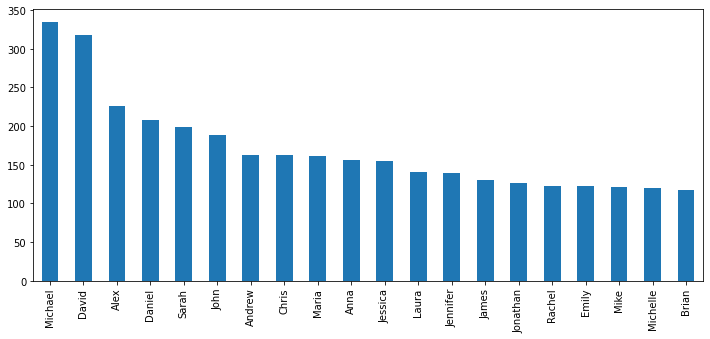

In [7]:
plt.figure(figsize=(12,5))
host=df_host.host_name.value_counts()[:20]
host.plot.bar()

**Inference**
Maximum booking was done by Michael followed by David, Alex and rest others

**Type of Rooms Available**

In [8]:
df_Air.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

([<matplotlib.patches.Wedge at 0x7f78cabeff10>,
 [Text(-0.06791271159741047, 1.0979015728213013, 'Entire home/apt'),
  Text(-0.014029046165556239, -1.0999105353908039, 'Private room'),
  Text(1.096946139126023, -0.08190951017135857, 'Shared room')],
 [Text(-0.037043297234951165, 0.5988554033570733, '52.0%'),
  Text(-0.00765220699939431, -0.5999512011222565, '45.7%'),
  Text(0.5983342577051034, -0.04467791463892285, '2.4%')])

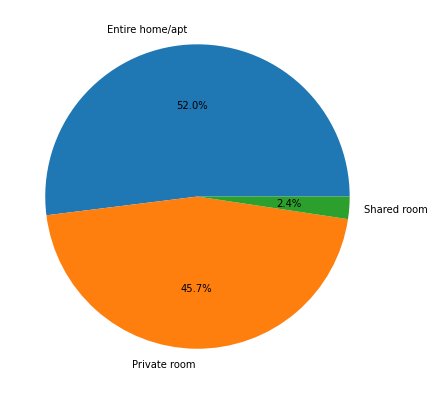

In [9]:
plt.figure(figsize=(7,7))
plt.pie(list(df_Air['room_type'].value_counts()),labels=list(df_Air['room_type'].value_counts().keys()),autopct='%0.1f%%')

**Inference**
Majority of rooms are Entire home/apt in which family or individual both can Stay

**Locations where Rooms are available**

In [10]:
df_year

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,Year
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,2018.0
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,2019.0
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,2019.0
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,2018.0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN
48891,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN
48892,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN
48893,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN


([<matplotlib.patches.Wedge at 0x7f78cabbdb20>,
 [Text(-0.49629950326062927, 0.9816755080286219, '2019.0'),
  Text(-0.15926771438203713, -1.088408836400882, '2018.0'),
  Text(0.6240430475757082, -0.9058533406531228, '2017.0'),
  Text(0.9708764238746166, -0.5171063426070466, '2016.0'),
  Text(1.0863337326787381, -0.1728554923752216, '2015.0'),
  Text(1.0995363460010192, -0.031934680564038614, '2014.0'),
  Text(1.0999548699439683, -0.009964140030534679, '2013.0'),
  Text(1.099994527900436, -0.0034696670009142705, '2012.0'),
  Text(1.099999823734443, -0.000622723208518039, '2011.0')],
 [Text(-0.2707088199603432, 0.5354593680156119, '64.9%'),
  Text(-0.08687329875383842, -0.5936775471277538, '15.6%'),
  Text(0.34038711685947715, -0.4941018221744306, '8.3%'),
  Text(0.5295689584770635, -0.282058005058389, '7.0%'),
  Text(0.5925456723702207, -0.09428481402284815, '3.6%'),
  Text(0.5997470978187377, -0.017418916671293787, '0.5%'),
  Text(0.5999753836058008, -0.005434985471200733, '0.1%'),
  T

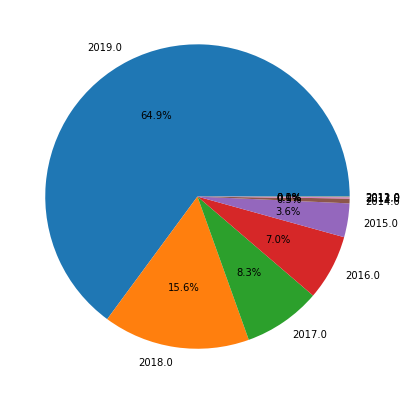

In [11]:
plt.figure(figsize=(7,7))
plt.pie(list(df_year['Year'].value_counts()),labels=list(df_year['Year'].value_counts().keys()),autopct='%0.1f%%')

In [12]:
year = df_year[df_year['Year'] == 2019]
df_year.neighbourhood_group.max()

'Staten Island'

**Inference** : 2019 is the year with most of reviews given at Staten Island

**No of time bokings made same location**

In [13]:
df_Air.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

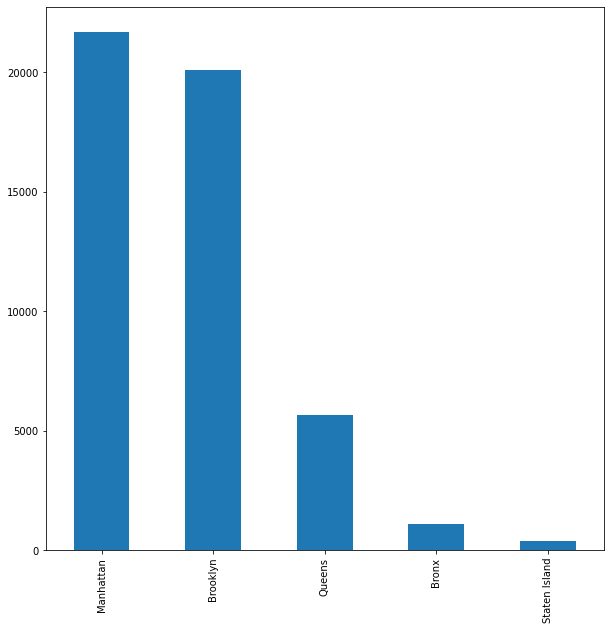

In [14]:
plt.figure(figsize=(10,10))
df_Air.neighbourhood_group.value_counts().plot.bar()

**Inference**
Booking was least to Staten Island just 373 times whereas went to Manhttan 21661 times

**Price and no of night one can travel to specfic location**

In [15]:
performance=df_Air.pivot_table(index=['neighbourhood_group','minimum_nights'],aggfunc='size')
performance=pd.DataFrame(performance)
performance
performance.rename(columns={0:'price'},inplace=True)
performance.reset_index(inplace=True)
performance
Bronx=performance[performance['neighbourhood_group'] == 'Bronx']
Brooklyn=performance[performance['neighbourhood_group']=='Brooklyn']
Manhattan=performance[performance['neighbourhood_group']=='Manhattan']
Queens=performance[performance['neighbourhood_group']=='Queens']
StatenIsland=performance[performance['neighbourhood_group']=='Staten Island']


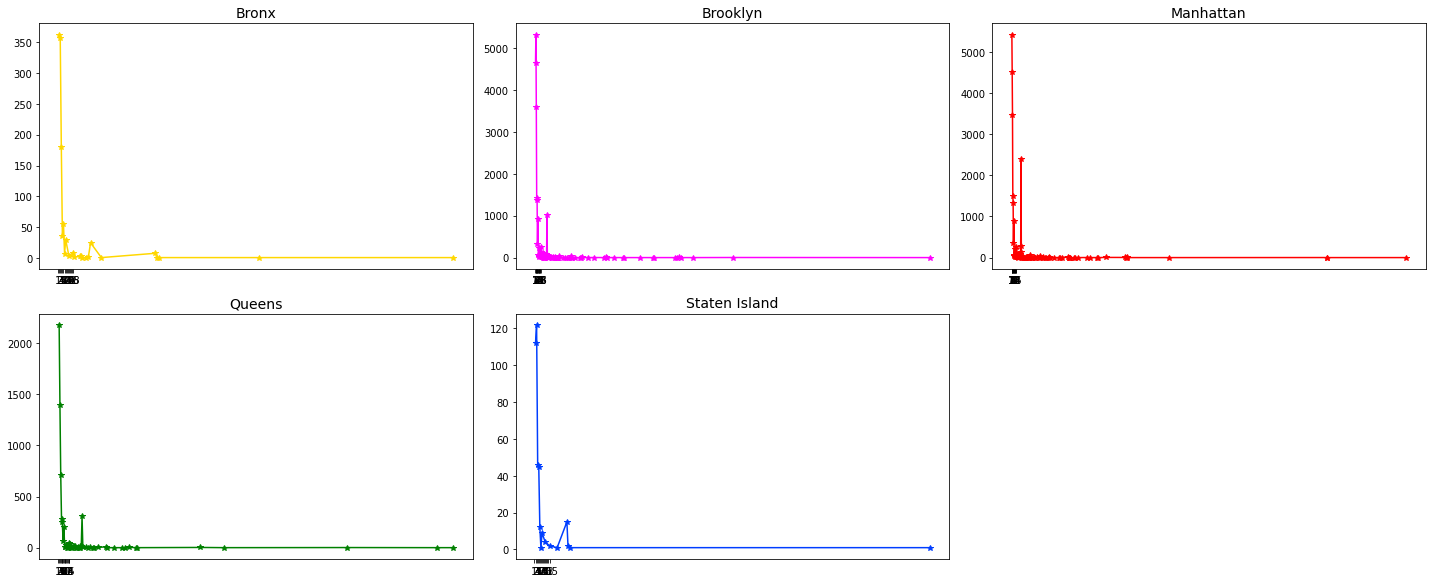

In [17]:
fig = plt.figure(figsize=(20,12))
#  subplot #1
plt.subplot(331)
plt.title('Bronx', fontsize=14)
plt.plot(Bronx['minimum_nights'],Bronx['price'],'-*',color='#FFD700')
plt.xticks(ticks=np.arange(15),labels= Bronx['minimum_nights'])
#  subplot #2
plt.subplot(332)
plt.title('Brooklyn', fontsize=14)
plt.plot(Brooklyn['minimum_nights'],Brooklyn['price'],'-*',color='magenta')
plt.xticks(ticks=np.arange(15),labels= Bronx['minimum_nights'])
#  subplot #2
plt.subplot(333)
plt.title('Manhattan', fontsize=14)
plt.plot(Manhattan['minimum_nights'],Manhattan['price'],'-*',color='red')
plt.xticks(ticks=np.arange(15),labels= Manhattan['minimum_nights'])
#  subplot #2
plt.subplot(334)
plt.title('Queens', fontsize=14)
plt.plot(Queens['minimum_nights'],Queens['price'],'-*',color='green')
plt.xticks(ticks=np.arange(15),labels= Queens['minimum_nights'])
#  subplot #2
plt.subplot(335)
plt.title('Staten Island', fontsize=14)
plt.plot(StatenIsland['minimum_nights'],StatenIsland['price'],'-*',color='#003EFF')
plt.xticks(ticks=np.arange(15),labels= StatenIsland['minimum_nights'])
plt.tight_layout()
plt.show()

**Which type of Room available of given years**

Text(0, 0.5, 'Count of Shared Rooms')

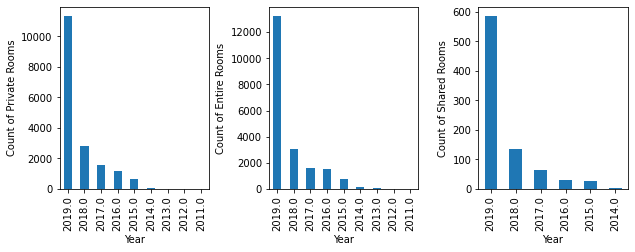

In [18]:
Private_room=df_year[df_year['room_type']=='Private room']
Entire_home=df_year[df_year['room_type']=='Entire home/apt']
Shared_room=df_year[df_year['room_type']=='Shared room']
plt.figure(figsize=(12,12))
plt.subplot(341)
Private_room['Year'].value_counts().plot.bar()
plt.xlabel('Year')
plt.ylabel('Count of Private Rooms')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.0,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4) 
plt.subplot(342)
Entire_home['Year'].value_counts().plot.bar()
plt.xlabel('Year')
plt.ylabel('Count of Entire Rooms') 
plt.subplot(343)
Shared_room['Year'].value_counts().plot.bar()
plt.xlabel('Year')
plt.ylabel('Count of Shared Rooms')


**Inference**
Private rooms are mostly used over the years

**prices which are available for 1 year**

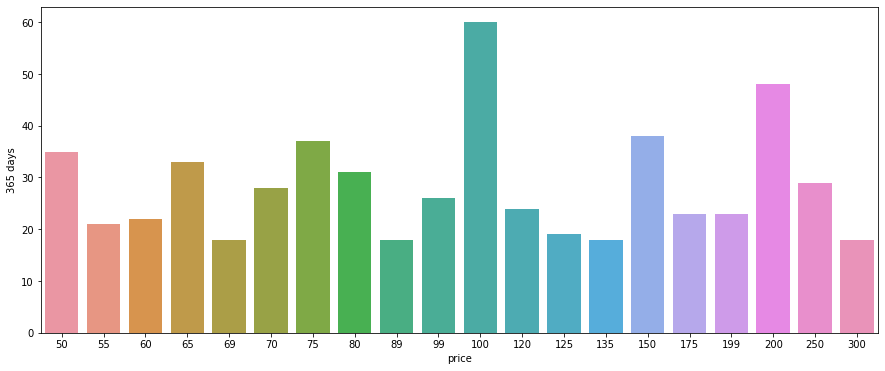

In [16]:
plt.figure(figsize=(15,6))
listing = df_Air[df_Air['availability_365'] == 365]['price'].value_counts()[0:20]
sns.barplot(y=listing,x=listing.index,orient='v')
plt.xlabel('price')
plt.ylabel('365 days')
plt.show()

**Total price as per minimum night stays**

In [17]:
df_Air['Price_stay'] = round(df_Air['price']*df_Air['minimum_nights'])
df_Air

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Price_stay
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,450
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,140
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,160
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,1150
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,55


**Areas where host travels the most at mentioned locations**

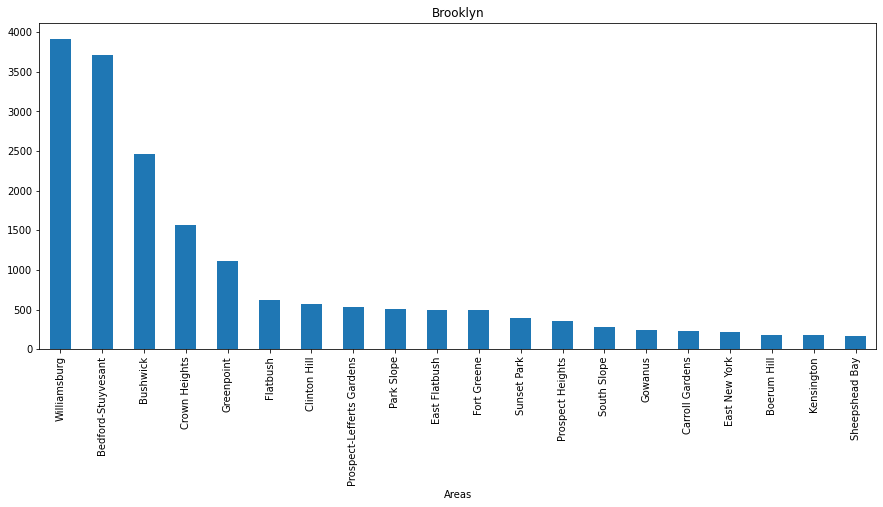

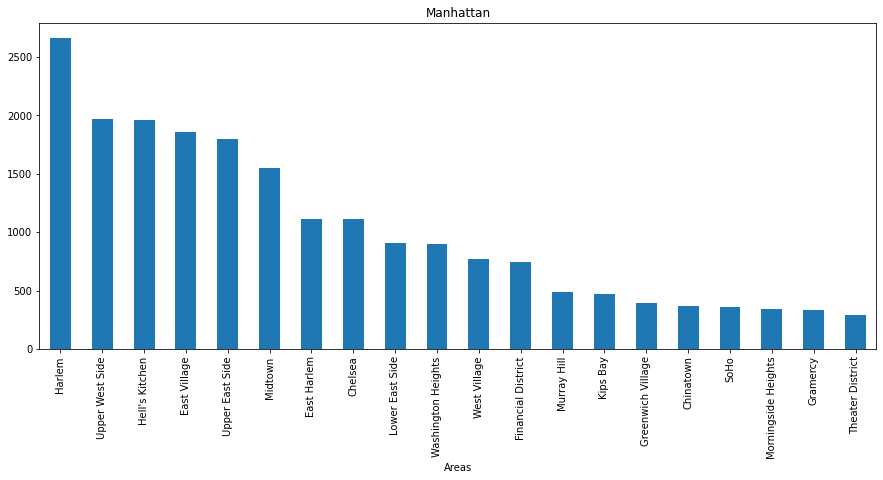

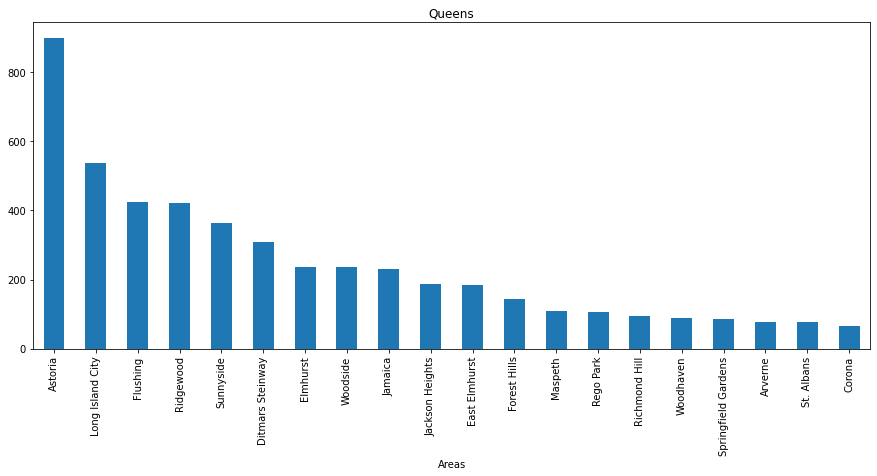

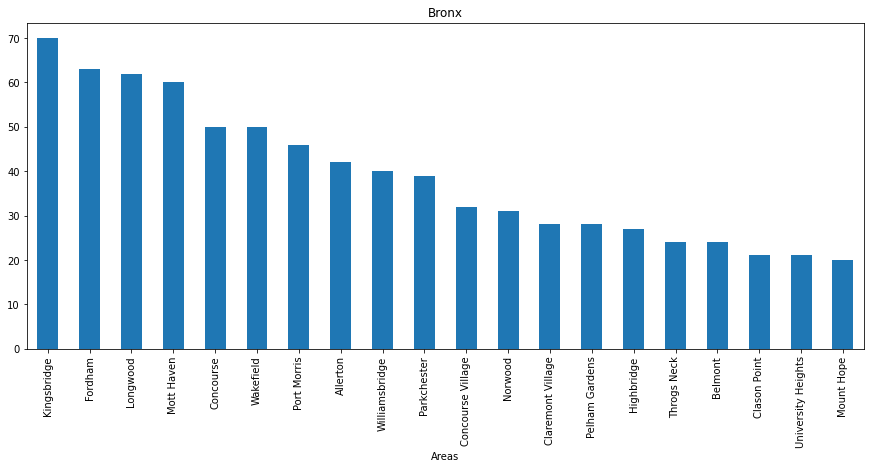

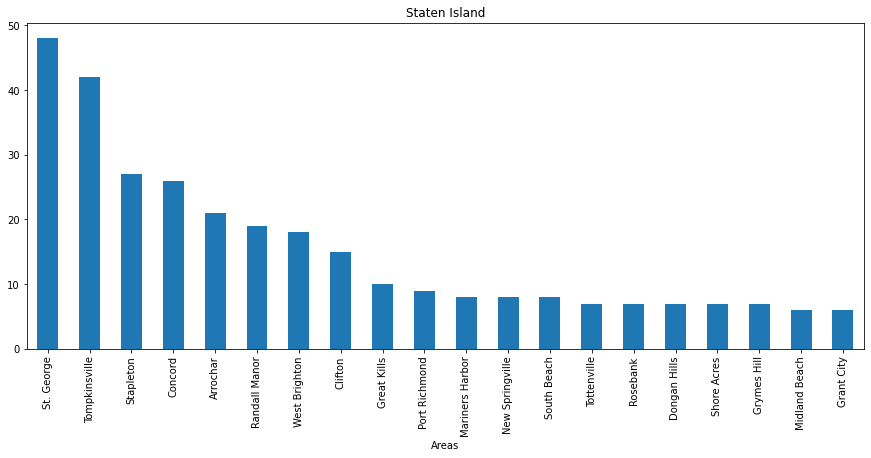

In [18]:
plt.figure(figsize=(15,6))
area_brooklyn = df_Air[df_Air['neighbourhood_group']=='Brooklyn']['neighbourhood'].value_counts()[0:20].plot.bar()
plt.title('Brooklyn')
plt.xlabel('Areas')
plt.show()

plt.figure(figsize=(15,6))
area_brooklyn = df_Air[df_Air['neighbourhood_group']=='Manhattan']['neighbourhood'].value_counts()[0:20].plot.bar()
plt.title('Manhattan')
plt.xlabel('Areas')
plt.show()

plt.figure(figsize=(15,6))
area_brooklyn = df_Air[df_Air['neighbourhood_group']=='Queens']['neighbourhood'].value_counts()[0:20].plot.bar()
plt.title('Queens')
plt.xlabel('Areas')
plt.show()

plt.figure(figsize=(15,6))
area_brooklyn = df_Air[df_Air['neighbourhood_group']=='Bronx']['neighbourhood'].value_counts()[0:20].plot.bar()
plt.title('Bronx')
plt.xlabel('Areas')
plt.show()

plt.figure(figsize=(15,6))
area_brooklyn = df_Air[df_Air['neighbourhood_group']=='Staten Island']['neighbourhood'].value_counts()[0:20].plot.bar()
plt.title('Staten Island')
plt.xlabel('Areas')
plt.show()

**Inference**: Williamsburg has highest count 

**Now exploring the dataframe of Listing according to their convenience i.e. - Price, Availablity and reviews.**

In [19]:
df_perform.head()

,id,name,price,availability_365,reviews_per_month
0,2539,Clean & quiet apt home by the park,149,365,0.21
1,2595,Skylit Midtown Castle,225,355,0.38
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,150,365,NaN
3,3831,Cozy Entire Floor of Brownstone,89,194,4.64
4,5022,Entire Apt: Spacious Studio/Loft by central park,80,0,0.10


In [20]:
df_perform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 48895 non-null  int64  
 1   name               48879 non-null  object 
 2   price              48895 non-null  int64  
 3   availability_365   48895 non-null  int64  
 4   reviews_per_month  38843 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.9+ MB


In [21]:
# creating copy of df_perform
df_perform_copy = df_perform.copy()

we saw there is some Nan values in average column. So try to replacing with 0.

In [22]:
# replace Nan values with 0
df_perform_copy = df_perform.replace(np.nan,0)

 **Now try to find to 10 most Listing having top 10 Prices**

In [23]:
df_highest_price = df_perform_copy.sort_values(['price'], ascending=False)
df_highest_price.head(10)

,id,name,price,availability_365,reviews_per_month
9151,7003697,Furnished room in Astoria apartment,10000,0,0.04
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,10000,0,0.16
29238,22436899,1-BR Lincoln Center,10000,83,0.00
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,9999,365,0.00
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",9999,83,0.14
6530,4737930,Spanish Harlem Apt,9999,0,0.02
30268,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,8500,251,0.18
4377,2953058,Film Location,8000,365,0.03
29662,22779726,East 72nd Townhouse by (Hidden by Airbnb),7703,146,0.00
42523,33007610,70' Luxury MotorYacht on the Hudson,7500,364,0.00


<Figure size 1080x288 with 0 Axes>

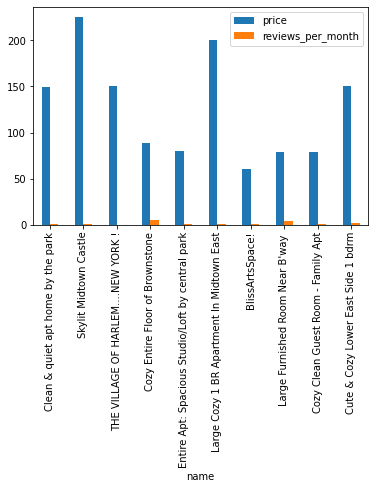

In [24]:
plt.figure(figsize=(15,4))
df_perform_copy.iloc[0:10].plot(x="name", y=['price','reviews_per_month'], kind = 'bar')
plt.show()

In [25]:
df_reviews = df_perform_copy.sort_values(['availability_365'], ascending=False)
df_reviews_1 = df_reviews.loc[df_reviews['reviews_per_month'] > 10.00]
df_reviews_1.head(10)

,id,name,price,availability_365,reviews_per_month
43404,33636410,The Sunshine Palace,125,362,12.00
45317,34673695,Home SWEET Home for a day or 2,50,356,12.11
27479,21646774,"STEPS TO LGA, Near CITIFIELD, JFK MANHATTAN(RM...",55,352,10.28
27369,21593310,"STEPS TO LGA, near CITIFIELD, JFK MANHATTAN(RM...",60,351,12.54
7086,5115372,Comfy Room Family Home LGA Airport NO CLEANING...,54,347,13.45
44561,34302570,"COSY BEDROOM CLOSE TO MANHATTAN, Brooklyn",59,347,10.31
21902,17609502,"5 minutes from JFK,one single cozy bedroom for...",45,345,11.91
23371,18914730,IDEALLY LOCATED COZY COTTAGE,95,345,10.34
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,48,341,16.22
21517,17222454,Sun Room Family Home LGA Airport NO CLEANING FEE,48,338,14.36


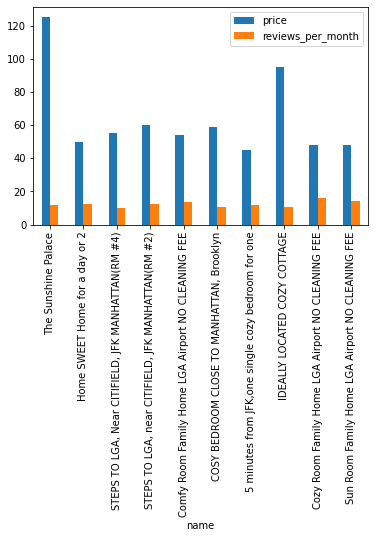

In [26]:
df_reviews_1.iloc[0:10].plot(x="name", y=['price','reviews_per_month'], kind = 'bar')
plt.show()

**Inference** : We found out top 10 most expensive places wrt thier reviews per month and rooms which are availble for most of the days whose review is greater than 10.0 per month. so by these graphs once can choose place according to their requiremnts i.e. higher price or availability

In [27]:
# df_Air.rename(columns={'matches_played':'number_of_reviews','matches_won':'reviews_per_month'},inplace=True)
df_Air

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Price_stay
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,450
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,140
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,160
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,1150
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,55


In [28]:
df_price_percent = df_Air.copy()
df_price_percent

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Price_stay
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,450
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,140
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,160
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,1150
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,55


**Max Price percent of room available 365 days**

In [29]:
df_price_percent['price_percent'] = (round(df_price_percent['availability_365']/df_price_percent['price'],2))*100
df_price_percent

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Price_stay,price_percent
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149,245.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225,158.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,450,243.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89,218.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,800,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,140,13.0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,160,90.0
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,1150,23.0
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,55,4.0


In [30]:
df_price_percent.min()

<ipython-input-30-cc75e4bfc92a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_price_percent.min()


id                                           2539
host_id                                      2438
neighbourhood_group                         Bronx
neighbourhood                            Allerton
latitude                                 40.49979
longitude                               -74.24442
room_type                         Entire home/apt
price                                           0
minimum_nights                                  1
number_of_reviews                               0
reviews_per_month                            0.01
calculated_host_listings_count                  1
availability_365                                0
Price_stay                                      0
price_percent                                 0.0
dtype: object

**Inference**: In Allerton Entire home/apt is available at minimum price

<Figure size 1080x288 with 0 Axes>

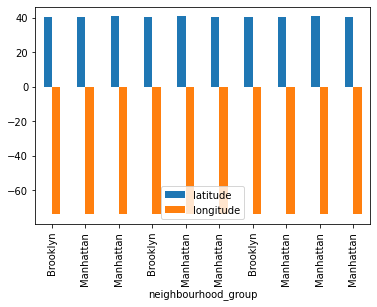

In [31]:
plt.figure(figsize=(15,4))
df_price_percent.iloc[0:10].plot(x="neighbourhood_group", y=['latitude','longitude'], kind = 'bar')
#plt.ylabel('Total Runs')
plt.show()

<b>SUMMARY</b>

Airbnb analysis project was made by kritika Sharma.In this project we got 5 different csv files as an input. The Csv files are Airbnb NYC 2019, host_id ,review_year, neighbourhood, Performance.

Initially I read the main dataset that was provided and try to figure out the data provided in the columns and try to link data of all the columns.
I used dataframe df_air and start analysing basic columns and presented them for better understanding.
I analysed the data accoundring to Location, year, price and others.
prepared the bargraph w.r.t price and availablility of 1 year.
Graphs for top 10 areas according to the mentioned location.
This is the way I started working and ended this project.
Detailed explaination of the project is mentioned in the video attacted.

##<b>CONCLUSION</b>

Created a project that covers the scenarios covering Host, Location, price, availibility, review per year, room type.
I have tried to represent all the scenarios in best possible ways so that one can have clearification looking the graphs, tables and charts.

##<b> Thank You</b>